


# Project: Investigate a Dataset (TMDb Movie Data!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> IMDB Movies rates , I selected this data to know about the rating and genre of movies they are well liked. Since there's a budget factor I need to know is it because the movie is good or the budget making the movie good and how much their revunes, so I choose to do my investigation on IMDB movies. 
I need to understand the popularity of the movies based on what? 
 
The questions are already asked but I will clarify it again.
 
**First, What are the movies with high popularity? **
 
**Secondly , How Much their revenues  ? **
 
**Finally, How much their budget? **


In [1]:
# I will use this cell to set up import all of the packages I need to use
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

% matplotlib inline

from google.colab import files # I used a method that I cau use it to upload the file 
uploaded = files.upload()


Saving tmdb-movies (1).csv to tmdb-movies (1).csv


<a id='wrangling'></a>
## Data Wrangling



In [2]:
# Load your data and print out a few lines. Perform operations to inspect data

imdb_df = pd.read_csv("tmdb-movies (1).csv" , sep=",")


In [3]:
imdb_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
imdb_df.tail()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,surfer|surfboard|surfing,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,fire|gun|drive|sacrifice|flashlight,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [5]:
imdb_df.shape

(10866, 21)

In [6]:
imdb_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [7]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [8]:
#cleaned, perform those cleaning steps in the second part of this section.
duplicate_rows_df = imdb_df[imdb_df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (1, 21)


In [9]:
imdb_df.count()


id                      10866
imdb_id                 10856
popularity              10866
budget                  10866
revenue                 10866
original_title          10866
cast                    10790
homepage                 2936
director                10822
tagline                  8042
keywords                 9373
overview                10862
runtime                 10866
genres                  10843
production_companies     9836
release_date            10866
vote_count              10866
vote_average            10866
release_year            10866
budget_adj              10866
revenue_adj             10866
dtype: int64

In [10]:
df = imdb_df.drop_duplicates()
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [11]:
df.count()

id                      10865
imdb_id                 10855
popularity              10865
budget                  10865
revenue                 10865
original_title          10865
cast                    10789
homepage                 2936
director                10821
tagline                  8041
keywords                 9372
overview                10861
runtime                 10865
genres                  10842
production_companies     9835
release_date            10865
vote_count              10865
vote_average            10865
release_year            10865
budget_adj              10865
revenue_adj             10865
dtype: int64

In [12]:
print(df.duplicated())


0        False
1        False
2        False
3        False
4        False
         ...  
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 10865, dtype: bool


In [13]:
print(df.isnull().sum())


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


In [14]:
df = df.dropna() 
df.count()

id                      1992
imdb_id                 1992
popularity              1992
budget                  1992
revenue                 1992
original_title          1992
cast                    1992
homepage                1992
director                1992
tagline                 1992
keywords                1992
overview                1992
runtime                 1992
genres                  1992
production_companies    1992
release_date            1992
vote_count              1992
vote_average            1992
release_year            1992
budget_adj              1992
revenue_adj             1992
dtype: int64

In [15]:
print(df.isnull().sum()) 



id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64


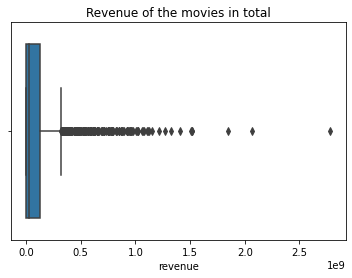

In [16]:
sns.boxplot( x =df['revenue'])
plt.title('Revenue of the movies in total');



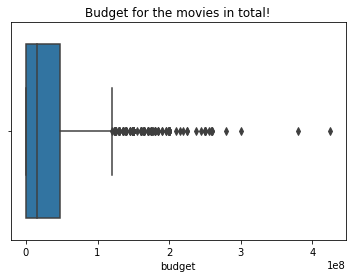

In [17]:
sns.boxplot(x=df['budget'])
plt.title('Budget for the movies in total!');



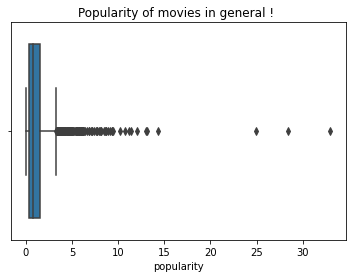

In [18]:
sns.boxplot(x=df['popularity'])

plt.title('Popularity of movies in general ! ');




Text(0.5, 1.0, 'Vote count !')

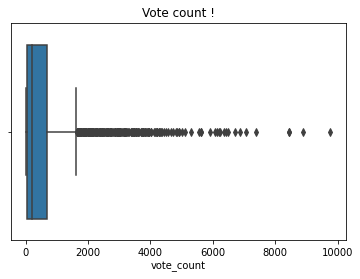

In [19]:
sns.boxplot(x=df['vote_count'])
plt.title('Vote count !')


Text(0.5, 1.0, 'Budget adjastive! ')

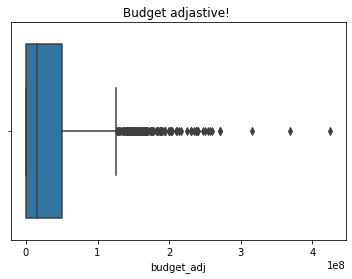

In [20]:
sns.boxplot(x=df['budget_adj'])
plt.title('Budget adjastive! ')


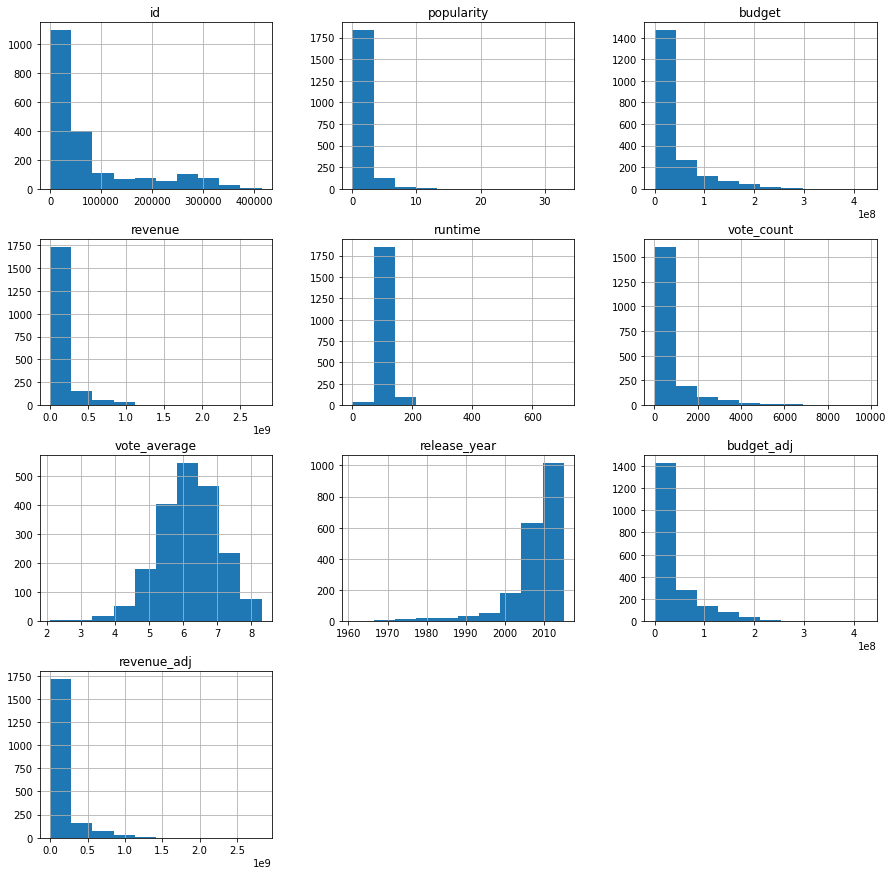

In [21]:
df.hist(figsize=(15, 15))

plt.show();


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (What are the movies with high popularity?)

In [22]:
p_df = df.sort_values('popularity' , ascending=False).head(n=10) 



In [23]:
p_df['revenue(million)'] = p_df['revenue'].apply(lambda x : x//1000000) 

p_df['budget(million']= p_df['budget'].apply(lambda x : x//1000000) 

p_df[['genres' ,  'original_title', 'popularity', 'budget', 'revenue']]

,genres,original_title,popularity,budget,revenue
0,Action|Adventure|Science Fiction|Thriller,Jurassic World,32.985763,150000000,1513528810
1,Action|Adventure|Science Fiction|Thriller,Mad Max: Fury Road,28.419936,150000000,378436354
629,Adventure|Drama|Science Fiction,Interstellar,24.949134,165000000,621752480
630,Action|Science Fiction|Adventure,Guardians of the Galaxy,14.311205,170000000,773312399
2,Adventure|Science Fiction|Thriller,Insurgent,13.112507,110000000,295238201
631,Action|Adventure|Science Fiction,Captain America: The Winter Soldier,12.971027,170000000,714766572
1329,Adventure|Action|Science Fiction,Star Wars,12.037933,11000000,775398007
632,Action|Thriller,John Wick,11.422751,20000000,78739897
3,Action|Adventure|Science Fiction|Fantasy,Star Wars: The Force Awakens,11.173104,200000000,2068178225
633,Science Fiction|Adventure|Thriller,The Hunger Games: Mockingjay - Part 1,10.739009,125000000,752100229


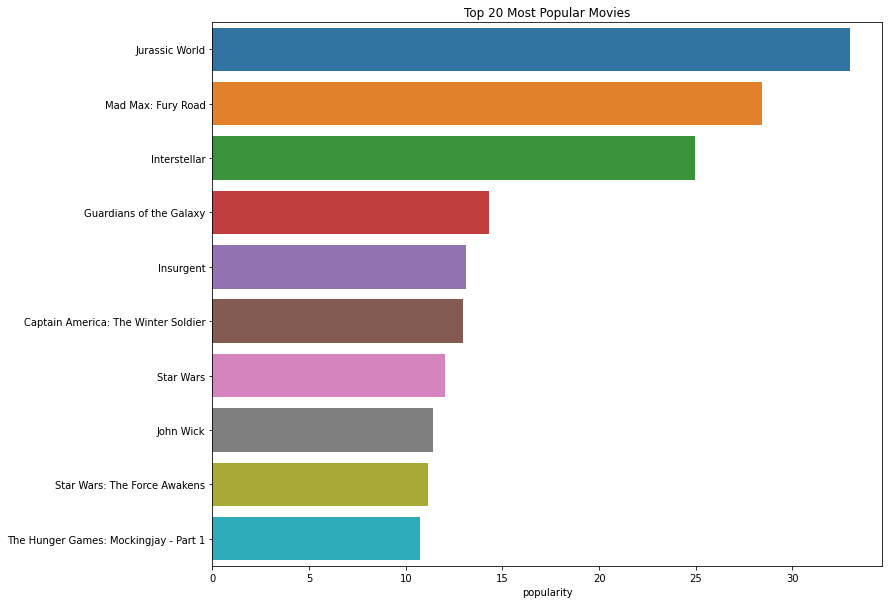

In [24]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
plt.figure(figsize=(12, 10))
ax = sns.barplot(y='original_title', x='popularity', data=p_df, order=p_df.sort_values('popularity', ascending=False).original_title, orient='h')

plt.title('Top 20 Most Popular Movies', fontsize=12)
plt.ylabel('')
plt.show()



```
Jurssica World is the most famous movie at this dataset as it shown graph above
```



**Research Question 2**
# `How much their revune?`


In [25]:
highest_revenue_movies = df.sort_values('revenue', ascending=False).head(n=20)
highest_revenue_movies['revenue(million)'] = highest_revenue_movies['revenue'].apply(lambda x : x//1000000)    # revenue in millions
highest_revenue_movies['budget(million)'] = highest_revenue_movies['budget'].apply(lambda x : x//1000000)    # revenue in millions
highest_revenue_movies[['genres' ,  'original_title', 'popularity', 'budget(million)', 'revenue(million)']]

,genres,original_title,popularity,budget(million),revenue(million)
1386,Action|Adventure|Fantasy|Science Fiction,Avatar,9.432768,237,2781
3,Action|Adventure|Science Fiction|Fantasy,Star Wars: The Force Awakens,11.173104,200,2068
5231,Drama|Romance|Thriller,Titanic,4.355219,200,1845
4361,Science Fiction|Action|Adventure,The Avengers,7.637767,220,1519
0,Action|Adventure|Science Fiction|Thriller,Jurassic World,32.985763,150,1513
4,Action|Crime|Thriller,Furious 7,9.335014,190,1506
14,Action|Adventure|Science Fiction,Avengers: Age of Ultron,5.944927,280,1405
3374,Adventure|Family|Fantasy,Harry Potter and the Deathly Hallows: Part 2,5.711315,125,1327
5422,Animation|Adventure|Family,Frozen,6.112766,150,1274
5425,Action|Adventure|Science Fiction,Iron Man 3,4.946136,200,1215


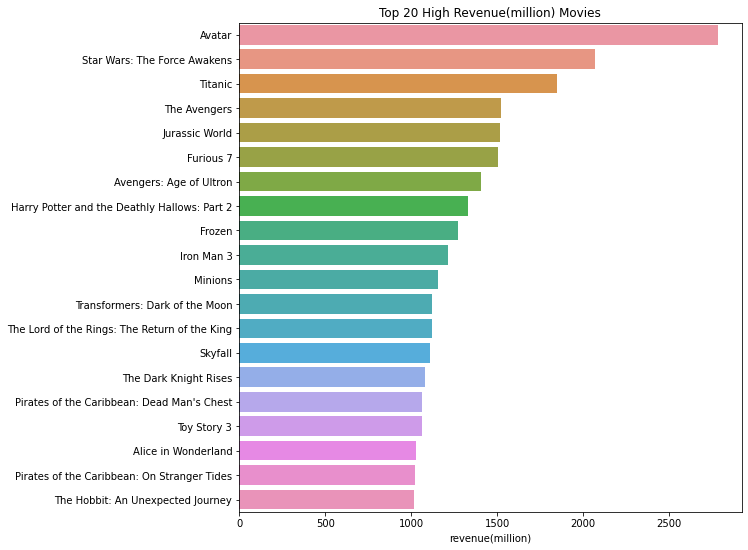

In [26]:
plt.figure(figsize=(9, 9))
ax = sns.barplot(y='original_title', x='revenue(million)', data=highest_revenue_movies, order=highest_revenue_movies.sort_values('revenue(million)', ascending=False).original_title)
plt.title('Top 20 High Revenue(million) Movies', fontsize=12)
plt.ylabel('')
plt.show()

`As it showes in the graph above Avatar has the most high rank revenue `

### **Research Question 3 ** (How Much their budget ?)

In [27]:
highest_budget_movies = df.sort_values('budget', ascending=False).head(n=20)
highest_budget_movies['revenue(million)'] = highest_budget_movies['revenue'].apply(lambda x : x//1000000)    # revenue in millions
highest_budget_movies['budget(million)'] = highest_budget_movies['budget'].apply(lambda x : x//1000000)    # revenue in millions
highest_budget_movies[['genres', 'original_title',  'popularity',  'budget(million)', 'revenue(million)']].head()

,genres,original_title,popularity,budget(million),revenue(million)
2244,Adventure|Fantasy|Action|Western|Thriller,The Warrior's Way,0.250540,425,11
3375,Adventure|Action|Fantasy,Pirates of the Caribbean: On Stranger Tides,4.955130,380,1021
7387,Adventure|Fantasy|Action,Pirates of the Caribbean: At World's End,4.965391,300,961
14,Action|Adventure|Science Fiction,Avengers: Age of Ultron,5.944927,280,1405
4411,Action|Adventure|Fantasy|Science Fiction,John Carter,1.588457,260,284


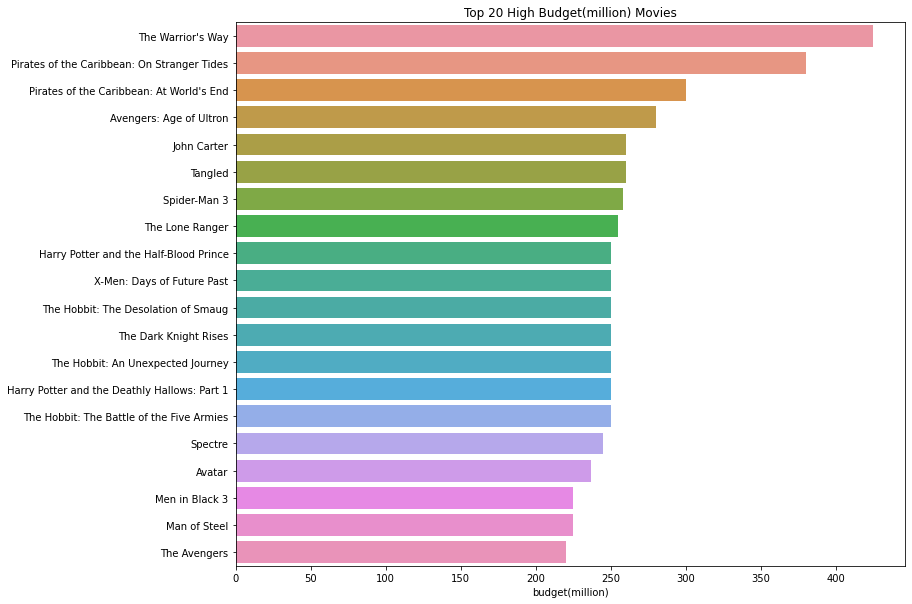

In [28]:
plt.figure(figsize=(12, 10))
ax = sns.barplot(y='original_title', x='budget(million)', data=highest_budget_movies, order=highest_budget_movies.sort_values('budget(million)', ascending=False).original_title)

plt.title('Top 20 High Budget(million) Movies', fontsize=12)
plt.ylabel('')
plt.show()

As it showes in the graph above The worrie's way has the most high rank budget
 

<a id='conclusions'></a>
## Conclusions

Since my analysis, it shows that a very high budget would help make it go huge or another successful for the movie. Since the budget is high, even higher revenue is given back. People love high-budget movies, so in my view, this is the reason to make it famous as my data showed

 I completely understand how money can be an incredible success factor.
The original characteristics were analyzed and included in the final budget, popularity and revenue analysis.


The limitations of the dataset are also in addition to the limitations found in the previous two studies. For instance, it is hard to understand and difficult to believe that all movies that have ever been released are included in this dataset. In this dataset, for example, there does not appear to be a way to differentiate revenues produced in the United States and revenues, among other limitations. the movies that beyoned overseas that has been created, this dataset omits others, in addition to the only success factors being sales and user ratings, such as what awards different movies might have accomplished, as well as several more limitations.